In [2]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# Import Freelancer Data

In [3]:
freelancer_all_df = pd.read_parquet("freelancer_all.parquet.zip")
freelancer_all_df.head()

,location,hours_per_week,hourly_rate,skills
freelancer_id,,,,
1,Asia,1,30.0,"[AI Services, Conversational AI, Prompt Engine..."
2,Asia,1,8.0,"[Transcription Deliverables, General Transcrip..."
5,Asia,0,45.0,"[Tech Support Services, Bug Reports, Incident ..."
9,Europe,1,75.0,"[Data Visualization Deliverables, Presentation..."
10,Africa,1,5.0,"[Scriptwriting Genres, Scriptwriting, Romance,..."


In [4]:
freelancer_train_df = pd.read_parquet("freelancer_train.parquet.zip")
freelancer_train_df.head()

,location,hours_per_week,hourly_rate,skills
freelancer_id,,,,
1232,Asia,1,8.0,"[Legal Virtual Assistance Skills, Filing, Spre..."
72,North America,1,35.0,"[Copy Editing Services, Formatting, Book Editi..."
612,Africa,2,15.0,"[Music Genres, Acoustic Music, Ambient Music, ..."
1047,Asia,2,25.0,"[Business Analysis & Strategy Skills, Business..."
1463,North America,2,85.0,"[Labor & Employment Law Skills, Employment Han..."


In [5]:
freelancer_test_df = pd.read_parquet("freelancer_test.parquet.zip")
freelancer_test_df.head()

,location,hours_per_week,hourly_rate,skills
freelancer_id,,,,
1230,Asia,1,9.99,"[SEO Services, Content SEO, Competitive Analys..."
215,South America,0,49.00,"[Business Size, Business with 100-999 Employee..."
1273,North America,2,250.00,"[Brand Strategy Skills, Branding, Corporate Br..."
1114,North America,1,65.00,"[Business Size, Business with 10-99 Employees,..."
1843,Africa,1,5.00,"[Business Size, Business with 10-99 Employees,..."


In [6]:
freelancer_val_df = pd.read_parquet("freelancer_val.parquet.zip")
freelancer_val_df.head()

,location,hours_per_week,hourly_rate,skills
freelancer_id,,,,
924,Africa,2,15.00,"[Proofreading Services, Voice & Tone Consisten..."
1163,Africa,2,25.00,"[Other Skills, MQL 5, API, MQL 4, Blockchain, ..."
373,North America,1,50.00,"[Grant Funding Areas, Human & Civil Rights, Pu..."
213,North America,2,9.99,"[Industry, Food & Beverage, Education, Fashion..."
1850,Asia,1,6.00,"[Lead Generation Software, HubSpot, Salesforce..."


# Import Jobs Data

In [7]:
jobs_all_df = pd.read_parquet("jobs_all.parquet.zip")
jobs_all_df.head()

,hourly_rate,freelancer_id,weekly_hours_needed,project_length,experience_level,skills_required,earnings,feedback_for_freelancer,client_location
job_id,,,,,,,,,
0,40.00,460,0,0,1,"[Copy Editing Services, APA Formatting, Other,...",153.33,5.0,North America
1,10.00,1392,0,1,1,"[Business & Proposal Writing Services, Busines...",151.67,3.0,North America
2,40.00,488,0,0,1,"[Tax Preparation Skills, Accounting Principles...",353.33,5.0,North America
3,65.31,881,2,0,1,"[Email Communication, Email Campaign Setup, Em...",812.51,5.0,North America
4,80.02,649,0,0,1,"[Business Plan, Financial Management, Investme...",350.00,5.0,North America


In [8]:
jobs_train_df = pd.read_parquet("jobs_train.parquet.zip")
jobs_train_df.head()

,hourly_rate,freelancer_id,weekly_hours_needed,project_length,experience_level,skills_required,earnings,feedback_for_freelancer,client_location
job_id,,,,,,,,,
1,10.00,1392,0,1,1,"[Business & Proposal Writing Services, Busines...",151.67,3.0,North America
5,30.55,1465,0,2,1,"[Music Production, Audio Production, Audio Eng...",185.00,5.0,Europe
6,50.00,1794,0,2,1,"[Grant Writing Services, Grant Writing, Grant ...",358.33,5.0,North America
8,64.62,87,2,0,1,"[Content Writing Services, Researcher, Content...",200.00,3.0,North America
9,150.00,105,0,1,1,"[Public Relations Services, Media Pitch, Media...",6000.00,3.0,North America


In [9]:
jobs_train_df[jobs_train_df["freelancer_id"] == 1413]

,hourly_rate,freelancer_id,weekly_hours_needed,project_length,experience_level,skills_required,earnings,feedback_for_freelancer,client_location
job_id,,,,,,,,,
49,95.50,1413,0,0,1,"[Logo Deliverables, Source File, Printable Fil...",812.51,3.00,North America
171,65.31,1413,2,0,1,"[Logo Design, Graphic Design, Brand Identity &...",812.51,5.00,Asia
252,65.31,1413,2,0,1,"[Logo Deliverables, Vector File Format, Logo S...",812.51,5.00,Europe
320,65.31,1413,2,0,1,"[Logo Deliverables, Logo Design, Printable Fil...",812.51,5.00,North America
392,90.95,1413,0,0,1,"[Logo Design, Graphic Design, Adobe Photoshop,...",812.51,5.00,North America
434,88.21,1413,2,0,1,"[Logo Design, Corporate Brand Identity, Busine...",812.51,3.00,North America
1506,88.21,1413,2,0,1,"[Logo Design, Graphic Design]",812.51,3.00,North America
1786,65.31,1413,2,0,1,"[Logo Design, Graphic Design, Adobe Illustrato...",812.51,5.00,North America
2172,95.71,1413,0,1,1,"[Logo Style, Minimalist, Versatile Logo Design...",812.51,3.00,Europe


In [10]:
jobs_test_df = pd.read_parquet("jobs_test.parquet.zip")
jobs_test_df.head()

,hourly_rate,freelancer_id,weekly_hours_needed,project_length,experience_level,skills_required,earnings,feedback_for_freelancer,client_location
job_id,,,,,,,,,
0,40.00,460,0,0,1,"[Copy Editing Services, APA Formatting, Other,...",153.33,5.0,North America
2,40.00,488,0,0,1,"[Tax Preparation Skills, Accounting Principles...",353.33,5.0,North America
4,80.02,649,0,0,1,"[Business Plan, Financial Management, Investme...",350.00,5.0,North America
12,69.07,1860,0,0,1,"[English to Turkish Translation, Turkish to En...",200.00,3.0,Europe
15,28.20,1370,2,0,1,"[Social Media Marketing, YouTube SEO, YouTube ...",36.00,3.0,Asia


In [11]:
jobs_val_df = pd.read_parquet("jobs_val.parquet.zip")
jobs_val_df.head()

,hourly_rate,freelancer_id,weekly_hours_needed,project_length,experience_level,skills_required,earnings,feedback_for_freelancer,client_location
job_id,,,,,,,,,
3,65.31,881,2,0,1,"[Email Communication, Email Campaign Setup, Em...",812.51,5.0,North America
7,58.32,57,0,0,1,"[Video Editing, Social Media Management, YouTu...",160.00,3.0,Europe
14,90.95,427,0,0,1,[Microsoft Excel],812.51,5.0,Oceania
17,53.46,1410,2,0,1,"[Written Languages, German, Marketing Copywrit...",390.00,5.0,Europe
19,90.95,881,0,0,1,"[ActiveCampaign, Lead Generation, Email Market...",812.51,5.0,Africa


# Word Embedding with TF-IDF for Skills

In [12]:
freelancers_skills = list(list(array) for array in freelancer_all_df["skills"].values)
jobs_skills = list(list(array) for array in jobs_all_df["skills_required"].values)
train_skills = freelancers_skills +  jobs_skills

In [15]:
freelancers_skills = [" ".join(freelancer) for freelancer in freelancers_skills]
jobs_skills = [" ".join(job) for job in jobs_skills]

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = freelancers_skills + jobs_skills

vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(corpus)

TfidfVectorizer(stop_words='english')

In [92]:
vectorizer.transform(["Legal Virtual Assistance Skills"]).toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

# Calculating Similarities and Creating Recommendations

In [93]:
def calculate_skills_similarity(series1, series2):
    if "skills_required" in series1.keys():
        skills = series1.loc["skills_required"]
        series1_embeddings = [vectorizer.transform([skill]).toarray()[0] for skill in skills]
    else:
        skills = series1.loc["skills"]
        series1_embeddings = [vectorizer.transform([skill]).toarray()[0] for skill in skills]
    if "skills_required" in series2.keys():
        skills = series2.loc["skills_required"]
        series2_embeddings = [vectorizer.transform([skill]).toarray()[0] for skill in skills]
    else:
        skills = series2.loc["skills"]
        series2_embeddings = [vectorizer.transform([skill]).toarray()[0] for skill in skills]
    
    return cosine_similarity(series1_embeddings, series2_embeddings).mean()

In [50]:
def calculate_job_similarity(job1, job2, skills_weight):

    point1 = job1.loc[['hourly_rate',  'weekly_hours_needed', 'project_length', 'experience_level', 'earnings']].to_numpy().reshape(1, -1)
    point2 = job2.loc[['hourly_rate',  'weekly_hours_needed', 'project_length', 'experience_level', 'earnings']].to_numpy().reshape(1, -1)

    skills_similarity = calculate_skills_similarity(job1, job2)
    other_similarity = cosine_similarity(point1, point2).mean()

    return skills_similarity * skills_weight + other_similarity * (1-skills_weight)

In [51]:
def calculate_profile_job_similarity(freelancer, job, skills_weight, location_weight):
    skills_similarity = calculate_skills_similarity(freelancer, job)
    location_similarity = int(freelancer.loc["location"] == job.loc["client_location"])
    
    freelancer_point = freelancer.loc[["hours_per_week", "hourly_rate"]].to_numpy().reshape(1, -1)
    job_point = job.loc[["weekly_hours_needed", "hourly_rate"]].to_numpy().reshape(1, -1)
    other_similarity = cosine_similarity(freelancer_point, job_point).mean()

    return skills_similarity * skills_weight + location_similarity * location_weight + other_similarity * (1-skills_weight-location_weight)


In [52]:
def calculate_job_history_similarity(open_job, job_history, skills_weight):
    total_jobs_similarity = 0
    number_of_jobs = 0

    for comp_job in job_history.iterrows():
        total_jobs_similarity += calculate_job_similarity(open_job, comp_job[1], skills_weight)
        number_of_jobs += 1
    
    return total_jobs_similarity / number_of_jobs if number_of_jobs > 0 else 0.5

In [53]:
def generate_job_recommendations(freelancer_profile, freelancer_job_history, open_jobs, profile_weight, skills_weight, location_weight):
    open_jobs_copy = open_jobs.loc[:]

    open_jobs_copy["profile_job_similarity"] = open_jobs_copy.apply(lambda x: calculate_profile_job_similarity(freelancer_profile, x, skills_weight, location_weight), axis=1)
    open_jobs_copy["job_history_similarity"] = open_jobs_copy.apply(lambda x: calculate_job_history_similarity(x, freelancer_job_history, skills_weight), axis=1)

    open_jobs_copy["recommendation_score"] = open_jobs_copy["profile_job_similarity"] * profile_weight + open_jobs_copy["job_history_similarity"] * (1 - profile_weight)

    recommended_jobs = open_jobs_copy.sort_values(['recommendation_score', "hourly_rate"], ascending=False)

    return recommended_jobs[:10]

In [94]:
freelancer_profile = freelancer_train_df.iloc[1]
freelancer_job_history = jobs_train_df[jobs_train_df["freelancer_id"] == freelancer_profile.name]
open_jobs = jobs_train_df

generate_job_recommendations(freelancer_profile, freelancer_job_history, open_jobs, 0.2, 0.7, 0)

,hourly_rate,freelancer_id,weekly_hours_needed,project_length,experience_level,skills_required,earnings,feedback_for_freelancer,client_location,profile_job_similarity,job_history_similarity,recommendation_score
job_id,,,,,,,,,,,,
409,10.00,374,0,1,1,[Writing],520.00,4.85,North America,0.299878,0.401525,0.381195
1743,65.31,150,2,0,1,[Content Writing],812.51,5.00,North America,0.299999,0.396573,0.377259
2018,38.17,321,2,0,1,[English],170.00,5.00,North America,0.353761,0.374204,0.370115
1863,57.89,1845,2,0,1,[English],180.00,3.00,North America,0.353841,0.369956,0.366733
1698,48.63,72,2,0,1,"[Ghostwriting, English, Book Writing, Ebook Wr...",1500.00,5.00,North America,0.335262,0.374480,0.366636
743,50.00,108,0,0,1,"[Resume Writing, English, Writing]",200.00,5.00,North America,0.317826,0.372768,0.361780
1704,88.21,359,2,0,1,"[Ghostwriting Services, Ghostwriting, Ebook Wr...",812.51,3.00,North America,0.303451,0.375589,0.361161
1323,46.09,321,0,2,1,"[Writing, English, Academic Writing, Content W...",356.50,3.00,North America,0.308852,0.371978,0.359353
1153,10.00,374,0,0,1,"[Writing, Website Copywriting, English]",110.00,5.00,Asia,0.317826,0.368972,0.358743


# Defining Performance Metrics

In [95]:
def calculate_average_precision(actual_jobs, recommended_jobs, cutoff=None):
    actual_jobs = set(actual_jobs.index)
    recommended_jobs = set(recommended_jobs.index[:cutoff])

    # Only consider top k recommended jobs where k is the number of completed jobs 
    cutoff = len(actual_jobs) if cutoff == None else cutoff

    number_of_total_recommendations = len(recommended_jobs)
    number_of_relevant_recommendations = len(actual_jobs.intersection(recommended_jobs))

    return number_of_relevant_recommendations / number_of_total_recommendations


In [96]:
def calculate_map(freelancer_df, jobs_df, profile_weight, skills_weight, location_weight):
    ap_list = []
    num_of_freelancers= len(freelancer_df)
    done = 0
    report_df = freelancer_df.loc[:,["skills"]]

    for freelancer_id, freelancer in freelancer_df.iterrows():
        jobs_history = jobs_df[jobs_df["freelancer_id"] == freelancer_id]
        recommended_jobs = generate_job_recommendations(freelancer, jobs_history, jobs_df, profile_weight, skills_weight, location_weight)
        
        ap = calculate_average_precision(jobs_history, recommended_jobs)
        ap_list.append(ap)
        
        report_df.loc[freelancer_id, "Num. Comp. Jobs"] = len(jobs_history)
        report_df.loc[freelancer_id, "Avg. Prec."] = ap

        done += 1
        print(f"\r{done} / {num_of_freelancers}: {ap}", end="")
    return (report_df, sum(ap_list) / len(ap_list))

In [97]:
report_df, mapk = calculate_map(freelancer_test_df, jobs_test_df, 0.4, 0.6, 0.1)

89 / 89: 0.6

In [98]:
mapk

0.3269662921348315

In [99]:
report_df

,skills,Num. Comp. Jobs,Avg. Prec.
freelancer_id,,,
1230,"[SEO Services, Content SEO, Competitive Analys...",9.0,0.6
215,"[Business Size, Business with 100-999 Employee...",5.0,0.4
1273,"[Brand Strategy Skills, Branding, Corporate Br...",4.0,0.4
1114,"[Business Size, Business with 10-99 Employees,...",0.0,0.0
1843,"[Business Size, Business with 10-99 Employees,...",1.0,0.1
...,...,...,...
818,"[Legal Virtual Assistance Skills, PACER, Filin...",5.0,0.1
1513,"[Business Size, Business with 10-99 Employees,...",5.0,0.5
772,"[Business Applications Expertise, CRM Software...",1.0,0.1


<Axes: xlabel='Num. Comp. Jobs', ylabel='Avg. Prec.'>

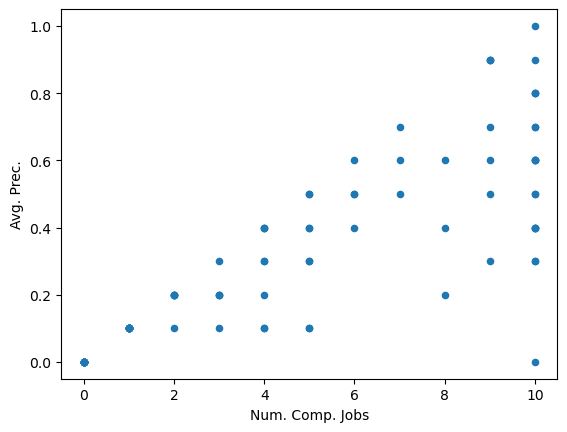

In [100]:
report_df[["Num. Comp. Jobs", "Avg. Prec."]].plot.scatter("Num. Comp. Jobs", "Avg. Prec.")